In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [6]:
URL = "https://www.amazon.com/s?k=play+station+4&crid=E1R26A03A4S0&sprefix=play+station+4%2Caps%2C2714&ref=nb_sb_noss_2"

In [7]:
# Headers for request
HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5' })

In [8]:
# HTTP Request
webpage = requests.get(URL, headers=HEADERS)

In [9]:
webpage

<Response [200]>

In [11]:
type(webpage.content)

bytes

In [12]:
# Soup Object containiang all data
soup = BeautifulSoup(webpage.content, "html.parser")

In [13]:
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [14]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [15]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/PlayStation-4-Slim-1TB-Console/dp/B071CV8CG2/ref=sr_1_1?crid=E1R26A03A4S0&amp;keywords=playstation+4&amp;qid=1668363970&amp;sprefix=play+station+4%2Caps%2C2714&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">PlayStation 4 Slim 1TB Console</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/ROTOMOON-Controller-Sweat-Proof-Compatible-Playstation/dp/B0B4WFJ6NK/ref=sr_1_2?crid=E1R26A03A4S0&amp;keywords=playstation+4&amp;qid=1668363970&amp;sprefix=play+station+4%2Caps%2C2714&amp;sr=8-2"><span class="a-size-medium a-color-base a-text-normal">ROTOMOON PS4 Glitter Silicone Controller Skins with 8 Thumb Grips &amp; L2 R2 Trigger Protector, Sweat-Proof Anti-Slip Controller Cover Skin Protector Compatible with Playstation 4 Slim/Pro Controller…</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s

In [16]:
link = links[0].get('href')

In [17]:
product_list = "https://amazon.com" + link

In [18]:
product_list

'https://amazon.com/PlayStation-4-Slim-1TB-Console/dp/B071CV8CG2/ref=sr_1_1?crid=E1R26A03A4S0&keywords=playstation+4&qid=1668363970&sprefix=play+station+4%2Caps%2C2714&sr=8-1'

In [19]:
new_webpage = requests.get(product_list, headers=HEADERS)

In [20]:
new_webpage

<Response [200]>

In [21]:
# Soup Object containiang all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
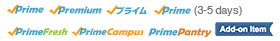

In [22]:
new_soup

In [25]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'PlayStation 4 Slim 1TB Console'

In [26]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [27]:
import numpy as np

In [28]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price
def get_price(soup):

    try:
        price = soup.find("span", attrs={'id':'priceblock_ourprice'}).string.strip()

    except AttributeError:

        try:
            # If there is some deal price
            price = soup.find("span", attrs={'id':'priceblock_dealprice'}).string.strip()

        except:
            price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [29]:
if __name__ == '__main__':

    # add your user agent 
    HEADERS = ({'User-Agent':'', 'Accept-Language': 'en-US, en;q=0.5'})

    # The webpage URL
    URL = "https://www.amazon.com/s?k=playstation+4&ref=nb_sb_noss_2"

    # HTTP Request
    webpage = requests.get(URL, headers=HEADERS)

    # Soup Object containing all data
    soup = BeautifulSoup(webpage.content, "html.parser")

    # Fetch links as List of Tag Objects
    links = soup.find_all("a", attrs={'class':'a-link-normal s-no-outline'})

    # Store the links
    links_list = []

    # Loop for extracting links from Tag Objects
    for link in links:
            links_list.append(link.get('href'))

    d = {"title":[], "price":[], "rating":[], "reviews":[],"availability":[]}
    
    # Loop for extracting product details from each link 
    for link in links_list:
        new_webpage = requests.get("https://www.amazon.com" + link, headers=HEADERS)

        new_soup = BeautifulSoup(new_webpage.content, "html.parser")

        # Function calls to display all necessary product information
        d['title'].append(get_title(new_soup))
        d['price'].append(get_price(new_soup))
        d['rating'].append(get_rating(new_soup))
        d['reviews'].append(get_review_count(new_soup))
        d['availability'].append(get_availability(new_soup))

    
    amazon_df = pd.DataFrame.from_dict(d)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

In [30]:
amazon_df

,title,price,rating,reviews,availability
0,PlayStation 4 Slim 1TB Console,,4.7 out of 5 stars,"15,166 ratings",
1,ROTOMOON PS4 Glitter Silicone Controller Skins...,,5.0 out of 5 stars,7 ratings,Not Available
2,"Sony PlayStation 4 Pro w/ Accessories, 1TB HDD...",$539.00,4.2 out of 5 stars,350 ratings,Not Available
3,Hunting Simulator - PlayStation 4,$16.71,4.3 out of 5 stars,937 ratings,Not Available
4,ADHLEK PS4 Wireless Controller for PS4/Slim/Pr...,$19.99,4.2 out of 5 stars,173 ratings,Not Available
5,BlueFire Professional 3.5mm PS4 Gaming Headset...,,4.4 out of 5 stars,"8,259 ratings",Not Available
6,BlueFire Stereo Gaming Headset for Playstation...,,4.4 out of 5 stars,"8,259 ratings",Not Available
7,Team Sonic Racing - PlayStation 4,$27.50,4.7 out of 5 stars,"1,488 ratings",Not Available
8,PlayStation 4 Slim 1TB Console - Only On PlayS...,,4.8 out of 5 stars,"8,860 ratings",Only 3 left in stock - order soon.
9,PlayStation 4 Slim 1TB Limited Edition Console...,,4.6 out of 5 stars,711 ratings,Only 1 left in stock - order soon.


In [31]:
pwd

'C:\\Users\\tarun\\Untitled Folder 1'